In [35]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [36]:
# Load data and
df = pd.read_csv('sample_data/marketing_data.csv')
df.dropna()
df.drop_duplicates()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [37]:
df[['PURCHASES_FREQUENCY', 'TENURE', 'PRC_FULL_PAYMENT']].describe(include='all')

,PURCHASES_FREQUENCY,TENURE,PRC_FULL_PAYMENT
count,8950.000000,8950.000000,8950.000000
mean,0.490351,11.517318,0.153715
std,0.401371,1.338331,0.292499
min,0.000000,6.000000,0.000000
25%,0.083333,12.000000,0.000000
50%,0.500000,12.000000,0.000000
75%,0.916667,12.000000,0.142857
max,1.000000,12.000000,1.000000


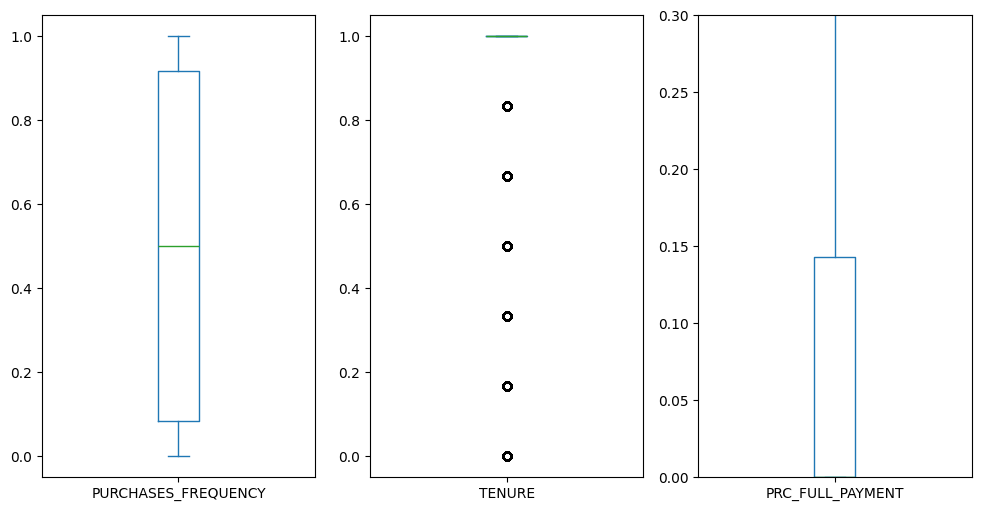

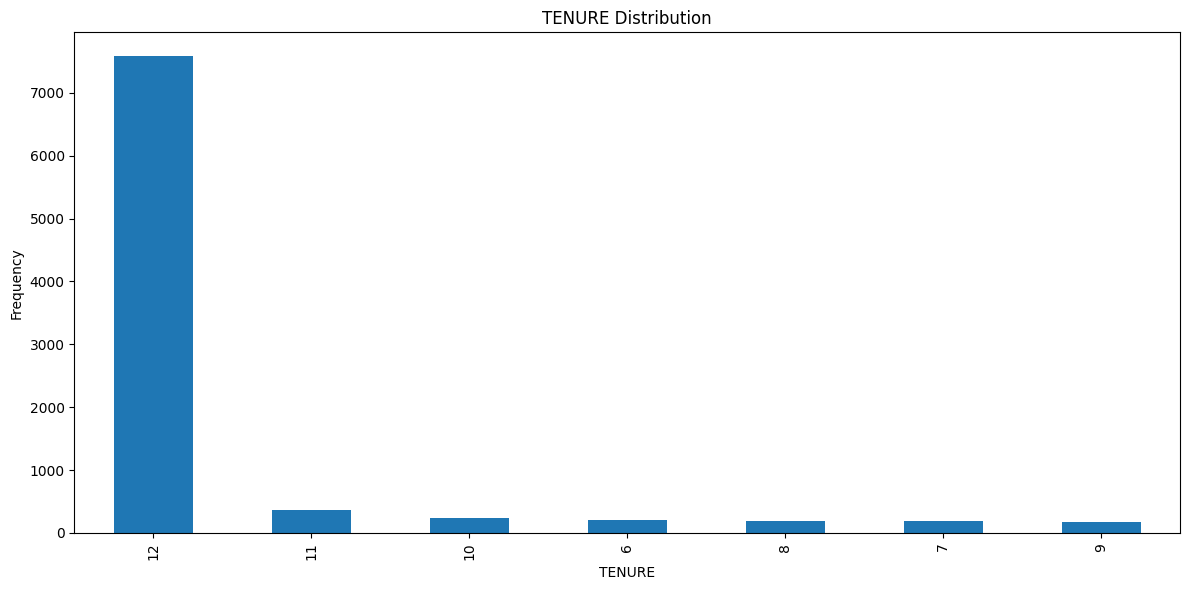

In [38]:
# Scaling - Normalizing the data to be between 0 and 1
df_scaled = (df[['PURCHASES_FREQUENCY', 'TENURE', 'PRC_FULL_PAYMENT']] - df[['PURCHASES_FREQUENCY', 'TENURE', 'PRC_FULL_PAYMENT']].min()) / (df[['PURCHASES_FREQUENCY', 'TENURE', 'PRC_FULL_PAYMENT']].max() - df[['PURCHASES_FREQUENCY', 'TENURE', 'PRC_FULL_PAYMENT']].min())

# Plotting scaled data
df_scaled.plot(kind='box', subplots=True, layout=(1,3), figsize=(12, 6))

# Adjusting ylim if necessary (example for 'PRC_FULL_PAYMENT')
plt.subplot(1, 3, 3) # Adjust the index accordingly
plt.ylim(0, 0.3) # Set the limit to focus on the main cluster of data

# If TENURE is a discrete variable, you might want to plot it differently:
plt.figure(figsize=(12, 6))
df['TENURE'].value_counts().plot(kind='bar')
plt.title('TENURE Distribution')
plt.xlabel('TENURE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

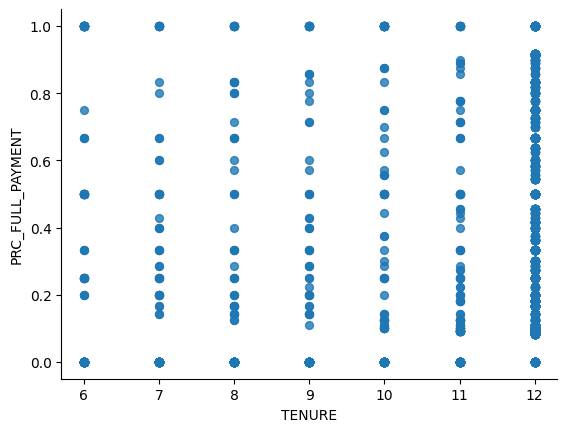

In [39]:
df.plot(kind='scatter', x='TENURE', y='PRC_FULL_PAYMENT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

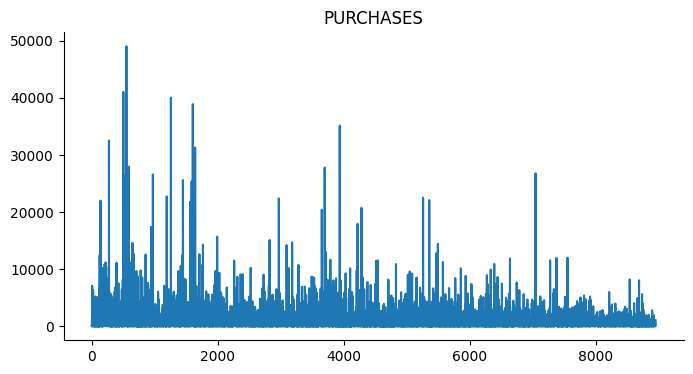

In [40]:
df['PURCHASES'].plot(kind='line', figsize=(8, 4), title='PURCHASES')
plt.gca().spines[['top', 'right']].set_visible(False)

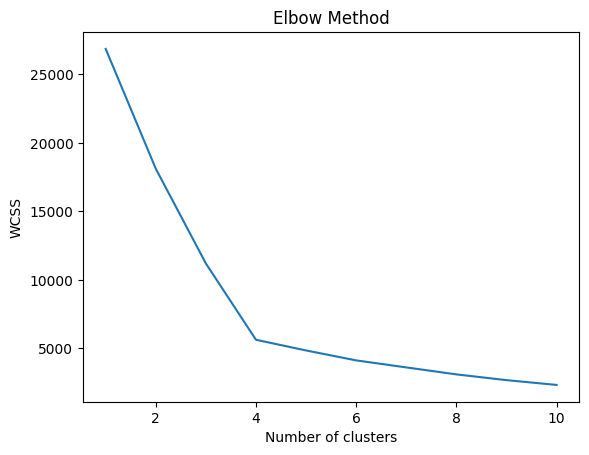

In [41]:
# Find the best number of clusters using elbow method for selected labes

df_features = df[['PURCHASES_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE']]

# Step 2: Pre-process the data (example: standardization)
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)

# Step 3: Apply the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_features_scaled)
    wcss.append(kmeans.inertia_)

# Step 4: Plotting to find the elbow point
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
X = df[['PURCHASES_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

# Assigning the cluster labels to your DataFrame as Loyalty_Category
df['Loyalty_Category'] = kmeans.labels_
labels = df['Loyalty_Category']

# Optionally, you might want to map numeric clusters to categorical labels
loyalty_mapping = {0: 'Bronze', 1: 'Silver', 2: 'Gold', 3: 'Platinum'}
df['Loyalty_Category'] = df['Loyalty_Category'].map(loyalty_mapping)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Loyalty_Category
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,Gold
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Gold
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,Bronze
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,Gold
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,Gold


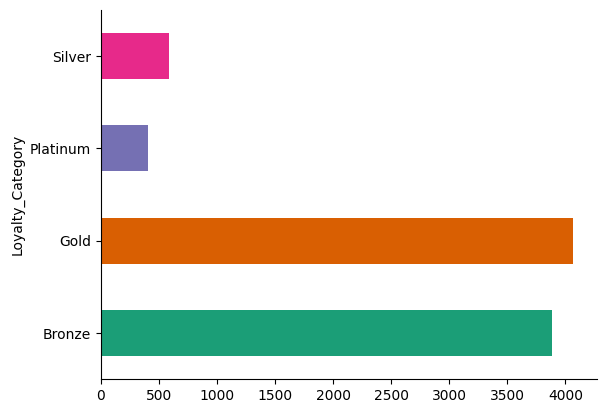

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Loyalty_Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [44]:
#Trying to do clustering with DBSCAN

df = pd.read_csv('sample_data/marketing_data.csv')
df.dropna()
df.drop_duplicates()

# Selecting only the relevant features for clustering
df_selected_features = df[['PURCHASES_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE']]

# Impute missing values using the median for the selected features
imputer = SimpleImputer(strategy='median')
df_selected_imputed = imputer.fit_transform(df_selected_features)

# Standardize the selected features
scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_selected_imputed)

# Apply DBSCAN clustering with determined parameters
# These parameters should be adjusted based on the specific dataset characteristics
dbscan = DBSCAN(eps=2.5, min_samples=34)
clusters_selected_features = dbscan.fit_predict(df_selected_scaled)

# Count the number of clusters and noise points
n_clusters_selected_features = len(set(clusters_selected_features)) - (1 if -1 in clusters_selected_features else 0)
n_noise_selected_features = list(clusters_selected_features).count(-1)

# Prepare the results in a new DataFrame for better visualization
result_df_selected_features = pd.DataFrame({
    'CUST_ID': df['CUST_ID'],
    'CLUSTER': clusters_selected_features
})

print("Number of clusters:", n_clusters_selected_features)
print("Number of noise points:", n_noise_selected_features)
print(result_df_selected_features.head())

Number of clusters: 1
Number of noise points: 0
  CUST_ID  CLUSTER
0  C10001        0
1  C10002        0
2  C10003        0
3  C10004        0
4  C10005        0


In [45]:
# Calculate the silhouette_score for the KMeans clustering we did and see the output

# Selecting only the relevant features for clustering
df_selected_features = df[['PURCHASES_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE']]

# Impute missing values using the median for the selected features
imputer = SimpleImputer(strategy='median')
df_selected_imputed = imputer.fit_transform(df_selected_features)

# Standardize the selected features
scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_selected_imputed)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_selected_scaled)

# Calculate the silhouette coefficient
silhouette_avg = silhouette_score(df_selected_scaled, clusters)

# Print the silhouette score
print("The average silhouette_score is :", silhouette_avg)

# Function to compute purity score
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

# Assuming you have true labels in 'class_label_column'
# purity = purity_score(df['class_label_column'], clusters)
# print("The purity score is :", purity)

# Print the cluster assignments
print(clusters[:10])  # showing only the first 10 cluster assignments

# So, a silhouette score of approximately 0.585 suggests that on average,
# objects are relatively well clustered.
# In other words, each data point is, on average,
# closer to the points in its own cluster than to points in other clusters,
# though there might still be some overlap or closely positioned clusters.
# This is generally a sign that the clustering configuration is fairly good and
# that the clusters are distinct from each other.

The average silhouette_score is : 0.5846283649339238
[3 3 0 3 3 0 2 0 3 3]
